<a href="https://colab.research.google.com/github/quincynjoroge/Crime-Analysis-/blob/EDA/Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Question


## Importing the libraries

In [ ]:
#Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import csv
#import re
#import preprocessor as tweet_proc
#from transformers import pipeline
#from happytransformer import HappyTextClassification
#from ekphrasis.classes.segmenter import Segmenter
#from emot.emo_unicode import UNICODE_EMO, EMOTICONS
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from nltk import FreqDist
#from pylab import rcParams

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the Dataset


In [ ]:
#load dataset
crime_df = pd.read_csv('/content/drive/MyDrive/GROUP 2/CSVfiles2/crime-k.csv')

In [ ]:
crime_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
#check top of our dataset head
crime_df.head()

,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
0,MuchangiNyaga5,@MathareSJustice @wanjirunjira @UhaiWetu @gach...,"Nairobi, Kenya",NaN,37,0,2,8/17/2021 8:59,0,[],police brutality
1,jmkariuki24,It is not easy being a young person in this co...,"Nairobi, Kenya",Evidence enthusiast with a passion for advanci...,8979,12175,276,8/17/2021 8:52,0,[],police brutality
2,FlavionsKimani,"You come to voters begging for votes, yet none...",Nairobi Kenya,"MUFC die hard,Opinions are my own #mufcfan,#mu...",1310,1561,66764,8/17/2021 8:48,0,[],police brutality
3,nyamu_dickson,It would be wise if we have bloggers with cont...,"Nairobi, Kenya","Love politics, sportsman (martial arts&footbal...",356,338,2578,8/17/2021 7:45,0,[],police brutality
4,prings_ke,"Before you vote, ask your candidates what they...","Thika, Kenya","Love one, love all.",382,1926,2529,8/17/2021 7:44,3,[],police brutality


In [ ]:
#check tail
crime_df.tail()

,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
2995,ErickOtienoMang,"Uhuru, pawns hunger-torture impunity; Judiciar...",Kenya,A global citizen in The Kenyan Arena embracing...,1488,595,30411,8/13/2021 17:08,0,[],corruption
2996,jeoges2,@danaceda @OliverMathenge How I wish they coul...,"Nairobi, Kenya",NaN,2280,298,968,8/13/2021 16:57,0,[],corruption
2997,the_oilmann,Same way the govt here has been much more succ...,"Kampala, Uganda","PanAfrican\n\nPetroleum geophysics\n\nStrange,...",683,450,565,8/13/2021 16:55,0,[],corruption
2998,johngithongo,"MUKAMI, ATELLAH, ZALAN &amp; NAMU - Kenya: Ins...","Nairobi, Kenya",CEO Inuka Kenya Ltd (by guarantee) https://t.c...,14013,286155,12384,8/13/2021 16:51,11,[],corruption
2999,Bilykemb,@FredMatiangi Stop lying day time. I used to r...,Mombasa,The greatest gift God gave to us is Life!! So ...,362,101,284,8/13/2021 16:50,0,[],corruption


In [ ]:
#check number of records
crime_df.shape

(3000, 11)

In [ ]:
#checking column types
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user             3000 non-null   object
 1   tweet            3000 non-null   object
 2   location         2974 non-null   object
 3   description      2816 non-null   object
 4   friends_count    3000 non-null   int64 
 5   followers_count  3000 non-null   int64 
 6   statuses_count   3000 non-null   int64 
 7   created_at       3000 non-null   object
 8   retweet_count    3000 non-null   int64 
 9   hashtags         3000 non-null   object
 10  label            3000 non-null   object
dtypes: int64(4), object(7)
memory usage: 257.9+ KB


In [ ]:
#checking summary stats
crime_df.describe()

,friends_count,followers_count,statuses_count,retweet_count
count,3000.000000,3.000000e+03,3000.000000,3000.000000
mean,2992.828667,5.317244e+04,32416.832667,5.548667
std,8171.445959,3.042223e+05,81256.419652,41.023968
min,0.000000,0.000000e+00,2.000000,0.000000
25%,332.000000,2.430000e+02,1417.750000,0.000000
50%,820.000000,8.925000e+02,5501.500000,0.000000
75%,2210.000000,5.074000e+03,25867.000000,1.000000
max,134907.000000,3.419116e+06,946688.000000,832.000000


In [ ]:
#checking for nulls
crime_df.isnull().sum()

user                 0
tweet                0
location            26
description        184
friends_count        0
followers_count      0
statuses_count       0
created_at           0
retweet_count        0
hashtags             0
label                0
dtype: int64

In [ ]:
#Lets extract only records where location is not null
crime_df = crime_df[crime_df['location'].notna()]


In [ ]:
#checking for nulls
crime_df.isnull().sum()

user                 0
tweet                0
location             0
description        174
friends_count        0
followers_count      0
statuses_count       0
created_at           0
retweet_count        0
hashtags             0
label                0
dtype: int64

We will remove the description column because it only represents the user's biography and thus is irrelevant to our analysis.

In [ ]:
#check number of records
crime_df.shape

(2974, 11)

In [ ]:
# check duplicates
crime_df.duplicated().sum()

0

In [ ]:
# dropping our duplicates
crime_df = crime_df.drop_duplicates()

In [ ]:
# check number of records
crime_df.shape

(2974, 11)

Our dataset has 1069 rows and 11 columns.

# Exploratory Data Analysis

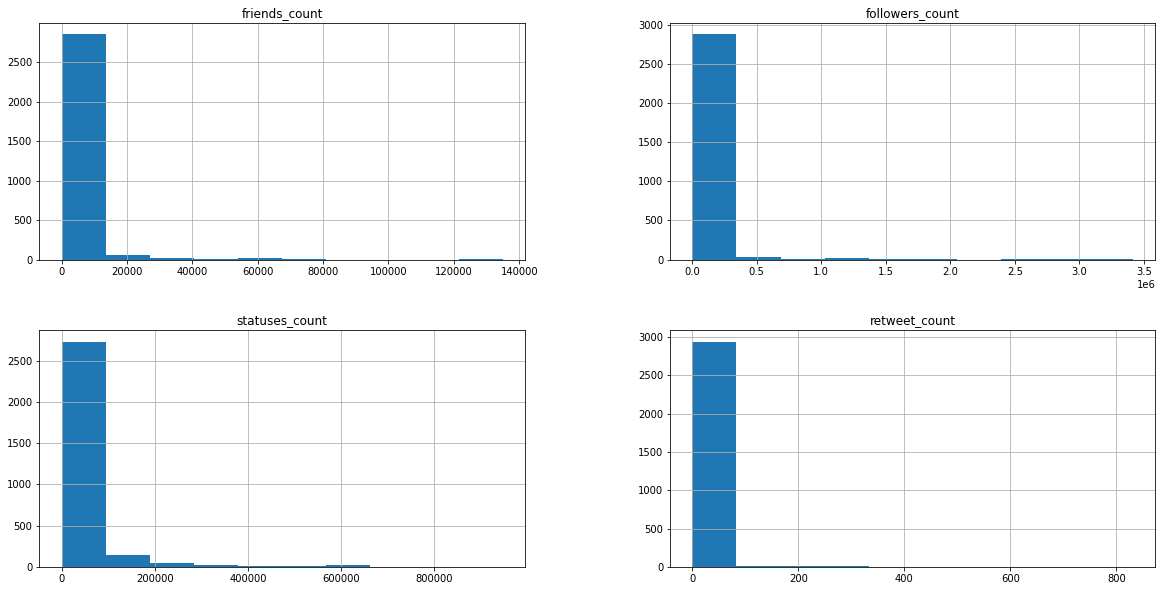

In [ ]:
# plotting histograms to visualize patterns in the data

crime_df = crime_df.copy(deep=True)

# plotting histograms
crime_df.hist(figsize = (20,10))
plt.show()

The histograms seem to be unimodal.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'tweets')

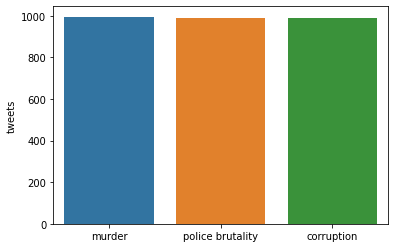

In [ ]:
# let us see how the labels are distributed in our dataset
# view data distribution for class imbalance
# checking the class balance of our
x=crime_df.label.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('tweets')

The ratio of the classes is considerable, our dataset seems to be well balanced.

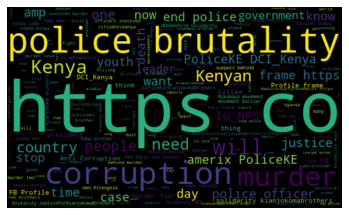

In [ ]:
#plotting the wordcount
from wordcloud import WordCloud 

allWords= ''.join( [twts for twts in crime_df['tweet']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#save whole dataset
crime_df.to_csv("crime_eda.csv",index=False)
